# Thêm các thư viện cần thiết

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Lấy data 

In [12]:
df = pd.read_csv("../datasets/heart_disease.csv")


HeartDiseaseorAttack     object
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


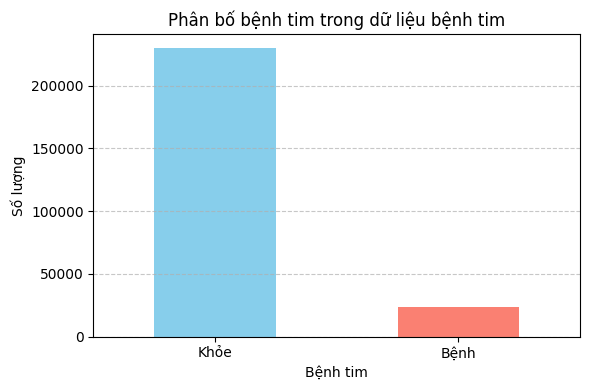

In [13]:
# df['Heart'] = df['target'].map({ 0: 'Khỏe',1: 'Bệnh'})
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({ 0: 'Khỏe',1: 'Bệnh'})
print(df.dtypes)

target_counts = df['HeartDiseaseorAttack'].value_counts()

plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Phân bố bệnh tim trong dữ liệu bệnh tim")
plt.xlabel("Bệnh tim")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:

from sklearn.preprocessing import StandardScaler, LabelEncoder

import joblib
# Mã hóa các biến phân loại
label_encoder = LabelEncoder()
df = df.drop(columns=['Fruits', 'Veggies', 'AnyHealthcare','NoDocbcCost', 'HvyAlcoholConsump', 'CholCheck', 'Education', 'Income'])

print(df.head())

scaler = StandardScaler()
X = df.drop(columns=['HeartDiseaseorAttack'])
X = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')
y = df['HeartDiseaseorAttack']
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Stroke  Diabetes  \
0                     0     1.0       1.0  40.0     1.0     0.0       0.0   
1                     0     0.0       0.0  25.0     1.0     0.0       0.0   
2                     0     1.0       1.0  28.0     0.0     0.0       0.0   
3                     0     1.0       0.0  27.0     0.0     0.0       0.0   
4                     0     1.0       1.0  24.0     0.0     0.0       0.0   

   PhysActivity  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  
0           0.0      5.0      18.0      15.0       1.0  0.0   9.0  
1           1.0      3.0       0.0       0.0       0.0  0.0   7.0  
2           0.0      5.0      30.0      30.0       1.0  0.0   9.0  
3           1.0      2.0       0.0       0.0       0.0  0.0  11.0  
4           1.0      2.0       3.0       0.0       0.0  0.0  11.0  


# Xây dựng model bằng tensor


In [16]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Xây dựng mô hình ANN
model = Sequential()

# # Lớp đầu tiên (input layer)
from tensorflow.keras.regularizers import l2
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))

# Lớp ẩn thứ hai
model.add(Dense(32, activation='relu'))

# Lớp đầu ra (output layer)
model.add(Dense(1, activation='sigmoid'))  # Sử dụng sigmoid vì bài toán phân loại nhị phân

# Tóm tắt mô hình
model.summary()


c:\Users\Admin\Documents\GitHub\Heart-disease-Prediction-1\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

# Huấn luyện mô hình

In [17]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
class_weight = {0: 1., 1: 6.}  # Lớp 1 (lớp thiểu số) có trọng số cao hơn

# Huấn luyện mô hình với class_weight
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight, callbacks=[checkpoint])

    
# Lưu mô hình sau khi huấn luyện
model.save('heart_disease_model_new.h5')


Epoch 1/30
6328/6342 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.7743

6342/6342 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7953 - loss: 0.7741 - val_accuracy: 0.7825 - val_loss: 0.4006
Epoch 2/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.6906

6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7940 - loss: 0.6906 - val_accuracy: 0.8009 - val_loss: 0.3909
Epoch 3/30
6318/6342 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.6953

6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7969 - loss: 0.6953 - val_accuracy: 0.8173 - val_loss: 0.3660
Epoch 4/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7976 - loss: 0.6897 - val_accuracy: 0.7947 - val_loss: 0.3904
Epoch 5/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7985 - loss: 0.6928 - val_accuracy: 0.7993 - val_loss: 0.4006
Epoch 6/30
6327/6342 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.6956

6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7987 - loss: 0.6955 - val_accuracy: 0.8178 - val_loss: 0.3615
Epoch 7/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7975 - loss: 0.6935 - val_accuracy: 0.8074 - val_loss: 0.3894
Epoch 8/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8000 - loss: 0.6941 - val_accuracy: 0.8095 - val_loss: 0.3778
Epoch 9/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8003 - loss: 0.6895 - val_accuracy: 0.8051 - val_loss: 0.3969
Epoch 10/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7973 - loss: 0.6927 - val_accuracy: 0.7881 - val_loss: 0.4108
Epoch 11/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8010 - loss: 0.6877 - val_accuracy: 0.7800 - val_loss: 0.4240
Epoch 12/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7945 - loss: 0.6930 - val_accuracy: 0.7927 - val_loss: 0.3962
Epoch 13/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7953 - loss: 0.6968 -

# Đánh giá mô hình

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8043 - loss: 0.3926
Accuracy: 80.20%
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     45968
           1       0.24      0.81      0.37      4768

    accuracy                           0.74     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.74      0.80     50736



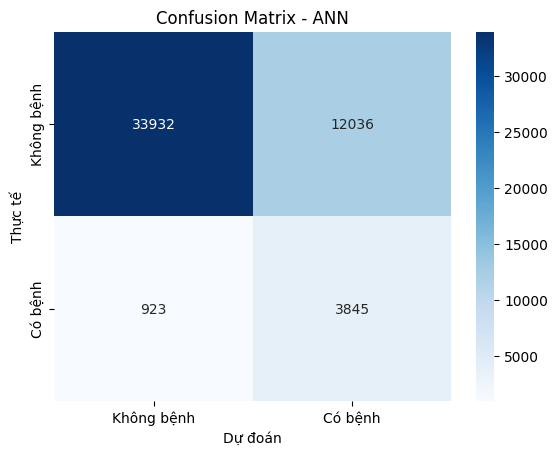

In [18]:
# Đánh giá mô hình
from tensorflow.keras.models import load_model

model= load_model('best_model.h5')
model = load_model('heart_disease_model_new.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4).astype(int)  
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)  # Tính toán ma trận nhầm lẫn

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - ANN")
plt.show()


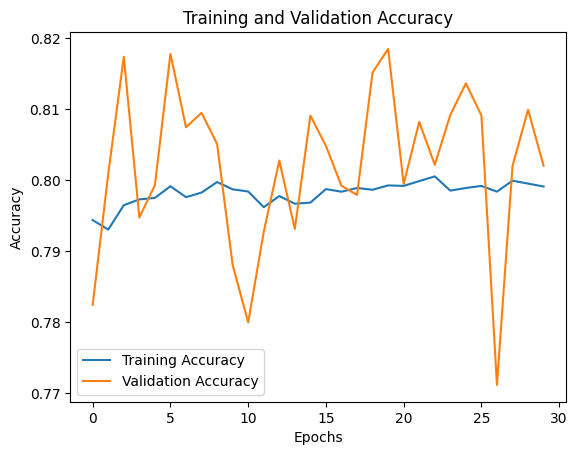

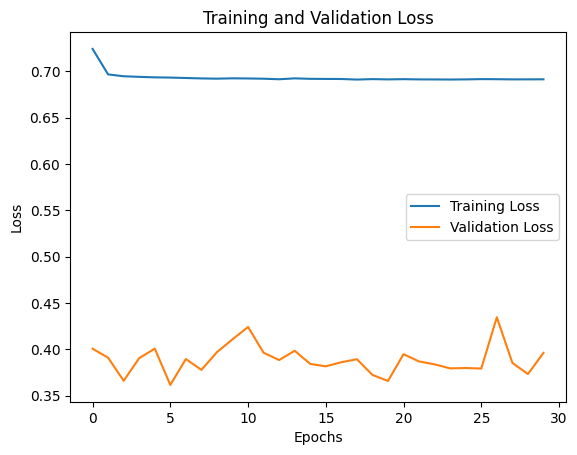

In [19]:
import matplotlib.pyplot as plt

# Vẽ đồ thị độ chính xác trong quá trình huấn luyện
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vẽ đồ thị tổn thất trong quá trình huấn luyện
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
from keras.models import load_model

# Tải mô hình đã lưu
model = load_model('heart_disease_model_new.h5')

# Biên dịch lại mô hình nếu cần (tùy thuộc vào yêu cầu)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

